# Analyzing the Stroop Effect

In this small project a dataset about the Stroop effects will be statiscally analysed. No cleaning or assessing of the date is necessary. Only a statiscal analysis and the results gathered are presented. The test conditions can be found [here](https://faculty.washington.edu/chudler/java/ready.html). Also one can read more about this special phenomenon in the [Wikipedia](https://en.wikipedia.org/wiki/Stroop_effect) page.

### Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Pre-Analysis
 - What is the independent variable? What is the dependent variable?
 
     - **Independant Variables:** The words/colors conditions, words matching colors or not matching (Congruent vs. Incongruent)
     - **Dependant Variables:** Time taken to read the whole list of words correctly
     
     
 
 - What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
 
     - Will the incongruent situation have an effect on one's ability to read through the list. We can define this is terms of the null hypothesis:
        H0: μC ≥ μI
        HA: μC < μI

   - **In words**: Will te incongruent situation affect the mean time of person reading the text or not. If we accept the null hypothesis, we ca say that not matching the words with color will have no effect on the time taken to read the while set of words. Rejecting this hypothesis means that the mean time taken to read the congruent situation is lower than the mean time taken to read the incongruent situation.

    - Given our data, we have two tests, performed on the same subject, hence is a dependant situation. We want to check if  **μC < μI** so we just need a one tailed test. Additionally we only have a sample of an unknown population. The best statistic test to tackle this situation will be the  one-tailed, dependent samples t-test.

   - The **T-Test** is appropriate since we have a small sample size ( less than 30) so our distribution will not resemble a Normal one, so it discards the option to do a Z-test. 

   - The choice for **One-Tailed** vs Two-Tailed test is due to intuition. It tell us that the incongruent situation will not improve reading times, can only increase them. So we can study only the negative side of the distribution, where μC-μI is less than zero.

   - We will seek to prove that is **statiscally significant** the difference between the Incongruent mean time and the Congruent mean time, so we can infer that people will always take less time to read the congruent conditon.
   
   
# Visualizations

## Bar Plot

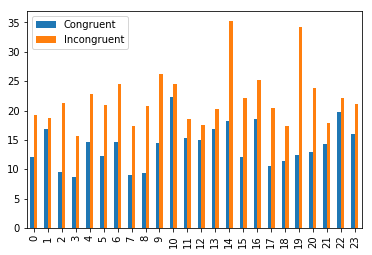

In [2]:
import numpy as np
import pandas as pd
import math

% matplotlib inline

df = pd.read_csv('stroopdata.csv')
df_I = df['Incongruent']
df_C = df['Congruent']

df.plot(kind='bar');


First we have just a plot with all of ours test subjects and their times in the respectives two tests. In blue is the congruent condition, orange is the incongruent condition. We can immediatelly see that the Orange vertical bars are always above the blue ones, hence it takes more time to read.

## Box Plot

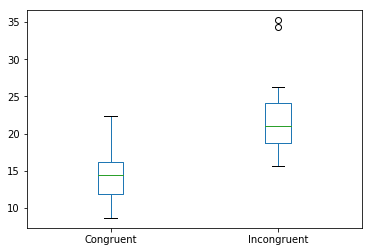

In [3]:
df.plot.box();

It is shown above the box plot of our data. We can cleary see the difference between both conditions. Green line being the mean, we see one way aove the other one. Also we can verify that in the incongruent situation, there are some outlier scores, proving the difficult it can be to read that condition.

## Dataset Description

In [7]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The table displays some statistical information about our data. We can immediately refer to the mean values, where we have that for the Congruent Condition is 14 seconds, and the Incongruent Condition we have 22. There is a 8 seconds extra mean time taken between both conditions.

## Histogram

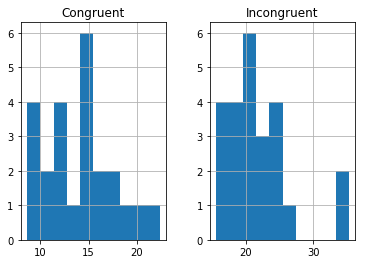

In [8]:
df.hist();

Looking at the histograms of our data, we can cleary note how this is ot normal distributed, due to the relatively small sample size. We can see that for the Congruent Condition most tests fall around 14seconds. The Incongruent conditions shows around 22 seconds. As expected from the mean we have obtained before.

# Statiscal Analysis

In [10]:
# Perform the statistical test here
import scipy.stats as stats

alpha = 0.01;
deg_free = 23;

T_critical = stats.t.ppf(alpha, deg_free)

print(T_critical)

stats.ttest_rel(df['Congruent'],df['Incongruent'])






-2.49986673949


Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

At a 99% confidence level and 23 degrees of freedom we can obtain a critical value of -2.5, for the one-tailed test in the negative direction. The T-Statistic we get from the test has a value of -8.02, way bellow our -2.5, which puts our T-Statistic value way deep into the critical region, thus we can reject the Null Hypothesis. The P-Value is also much smaller than the typical used threshold of 0.0001. We can say that the there is a statistically significant difference between the time taken to read the congruent and incongruent conditions. We can infer that the congruent mean time will always be less than then incongruent.

In [11]:
df_mean = df['Congruent'] - df['Incongruent']

#n, min_max, mean, var, skew, kurt = df.describe();
count, mean, std, mean_min, quart_1st, quart_half, quart_75, man_max = df_mean.describe();

alpha = 0.05;
deg_free = 23;

T_critical = stats.t.ppf(alpha/2, deg_free)


scale=std/math.sqrt(count);


CI_1 =  [mean + T_critical * scale , mean - T_critical * scale]

print(CI_1)

[-10.01902790936491, -5.9105554239684217]


# Conclusions

Above we have constructed the 95% confidence interval. We have used the difference of means to construct this interval. We can then infer that our difference between the time taken to read the words in the congruent condition will take between 5.91 and 10.02 seconds less when compared to the incongruent condition. 

I believe that the reason why we observe such a big discrepancy between the two tests is due to the brain focusing on reading the word, rather than recognizing the color. Disassociating those two brain tasks might pose a complicated situation for most people, specially if they are not used to perform such tests. The color recognition will not come naturally, and the brain will fight itself due to the conflict of the read word with the color of the word. That conflict takes sometime to be resolved and be verbalized. That time adds up throughout all the words, which will result in the total time being increased.

We can see similar effects on tests such as has a spatial stroot tests, where arrows are placed bellow or above a central focus point and the test subject is to recognize what direction the arrow points to. Subjects will take more time resolving the incongruent codition, arrow point down above the central point, when compared to the congruent condition. 

We can also think about the numerical stroop test. Where numbers are printed with different sizes. The congruent condition would be a bigger number having a larger size than a smaller number. Subjects will take longer to recognize which number is bigger when they are faced with a incongruent condition. 